In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve

# Statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_rel
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance

# metrics
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# warnings
import warnings 
warnings.filterwarnings('ignore', category=FutureWarning)


# 1. Dataset Overview

In [2]:
# 1. load dataset
# The UCI ML Repository structure is not working. It's flagged as an error: "HTTPError: HTTP Error 404: Not Found." Therefore, I'm supposed to use the local, downloaded files. 
df = pd.read_csv('./bank-additional/bank-additional-full.csv')

#### 1.1 Basic dataset information

In [34]:
df.shape
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


#### 1.2 Summary statistics for numerical variables

In [37]:
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
display(df[numerical_cols].describe())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### 1.3 Value counts for categorical variables

In [38]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                    'contact', 'month', 'day_of_week', 'poutcome', 'y']
print("\nValue Counts (Categorical):")
for col in categorical_cols:
    print(f"\n{col}:")
    display(df[col].value_counts(dropna=False))


Value Counts (Categorical):

job:


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


marital:


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


education:


university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


default:


no         32588
unknown     8597
yes            3
Name: default, dtype: int64


housing:


yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


loan:


no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


contact:


cellular     26144
telephone    15044
Name: contact, dtype: int64


month:


may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


day_of_week:


thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


poutcome:


nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


y:


no     36548
yes     4640
Name: y, dtype: int64

#### 1.4 Class distribution for target variable


Target Variable Distribution
no     36548
yes     4640
Name: y, dtype: int64

Target Distribution (%):
no     88.73
yes    11.27
Name: y, dtype: float64


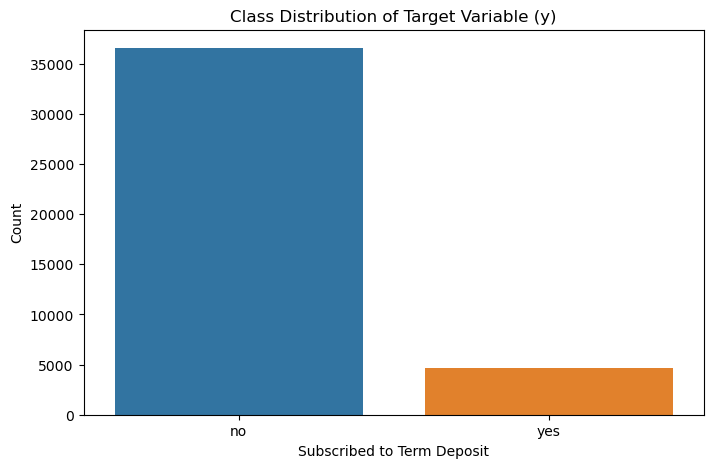

In [48]:
print("\nTarget Variable Distribution")
target_col = 'y'
print(df[target_col].value_counts())
print(f"\nTarget Distribution (%):")
print((df[target_col].value_counts(normalize=True) * 100).round(2))

plt.figure(figsize=(8, 5))
sns.countplot(x='y', data=df)
plt.title('Class Distribution of Target Variable (y)')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.show()

# 2. Feature Analysis

#### 2.1 Histograms for numerical features

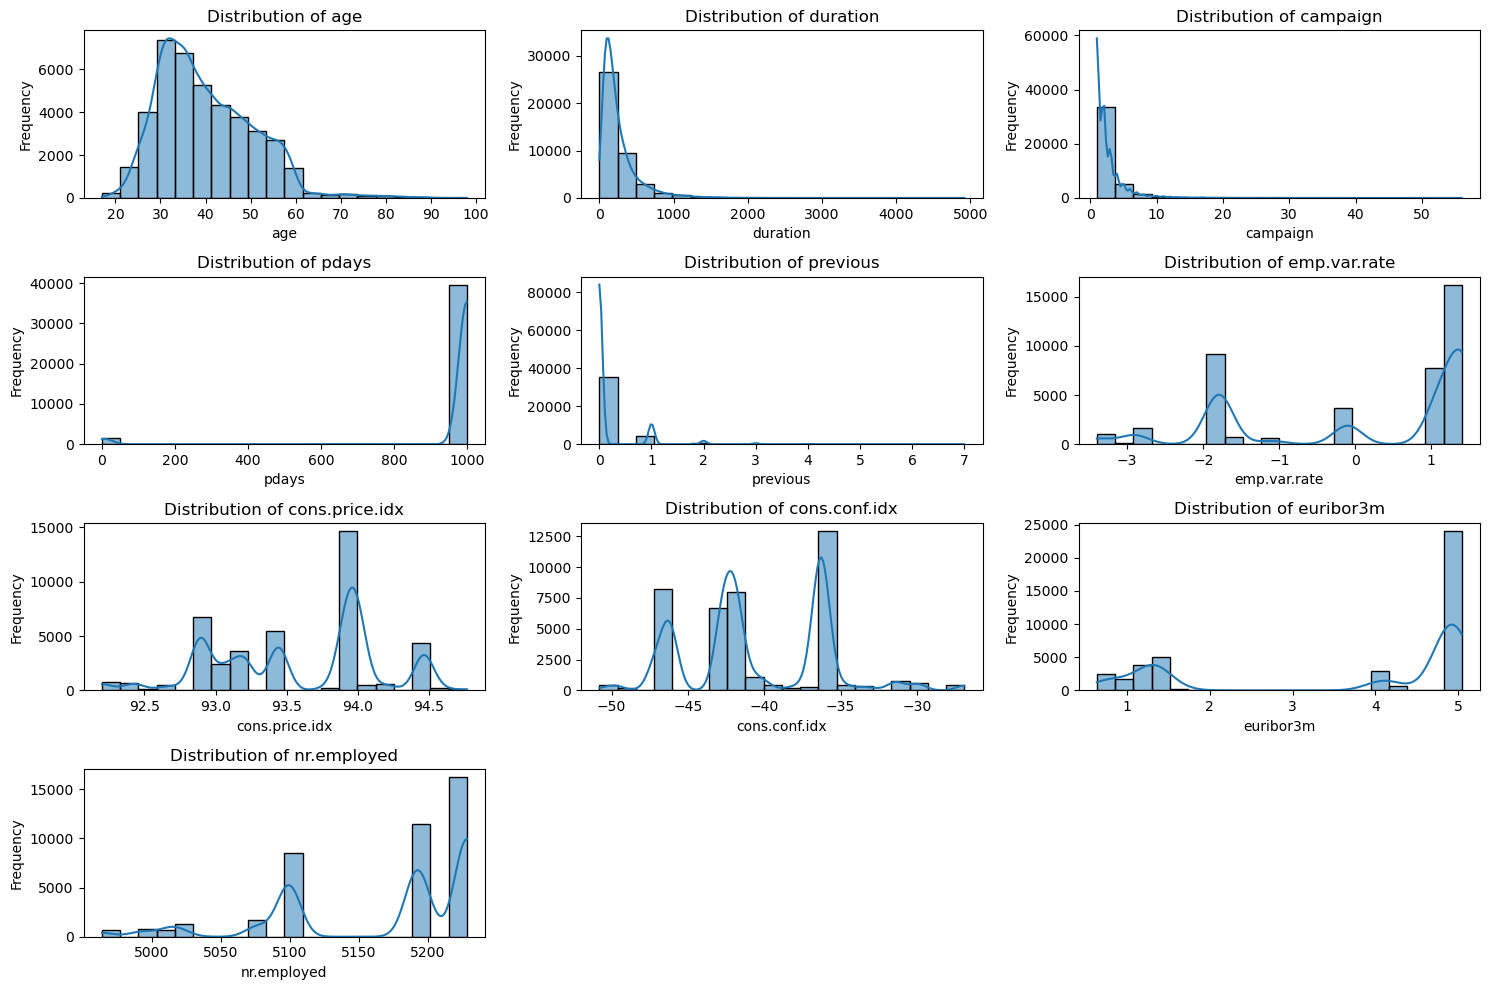

In [50]:
# Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### 2.2 Bar plots for categorical features

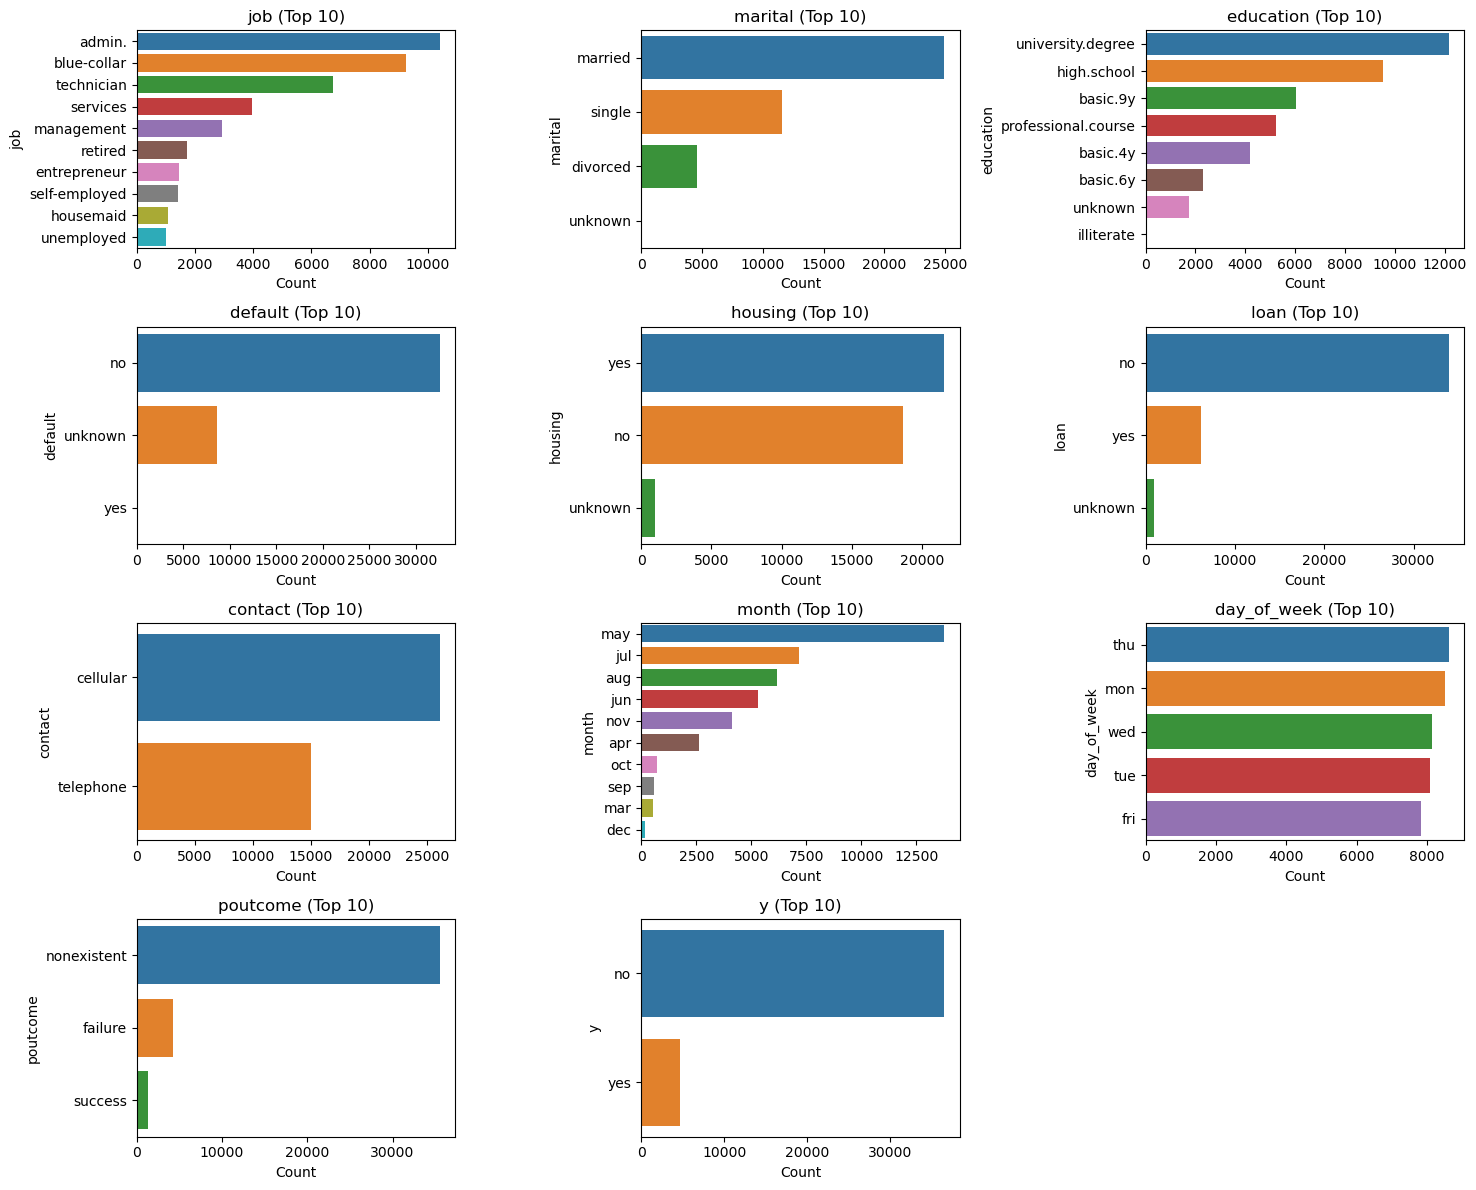

In [60]:
# Bar plots
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)
    value_counts = df[col].value_counts().head(10)  
    
    sns.barplot(x=value_counts.values, y=value_counts.index)
    plt.title(f'{col} (Top 10)')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

#### 2.3 Correlation heatmap for numerical features

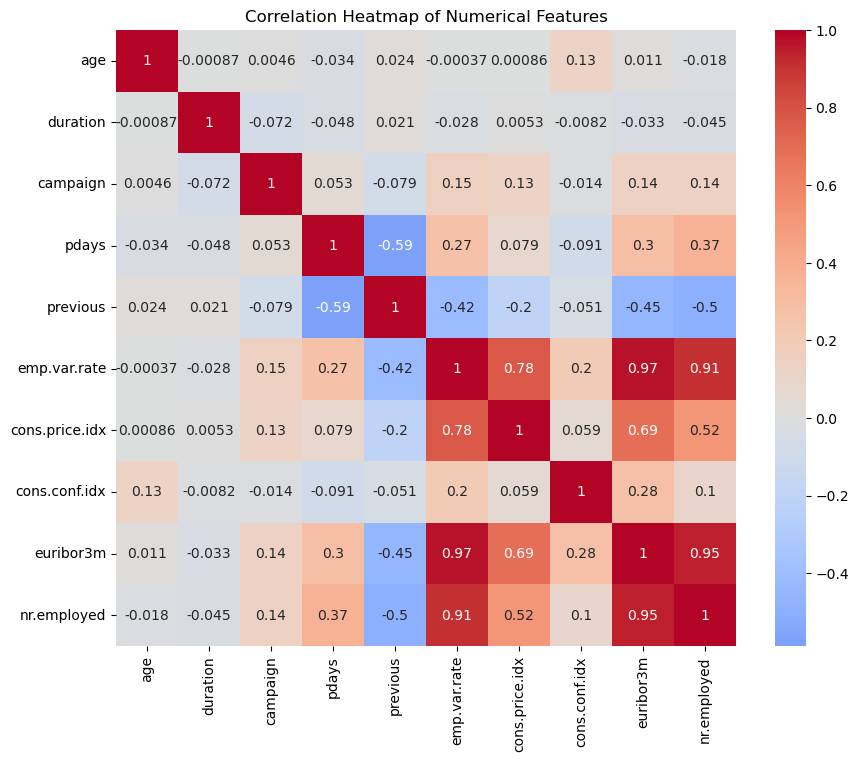

In [64]:
# heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#### 2.3 Identification relationships between features and target variable

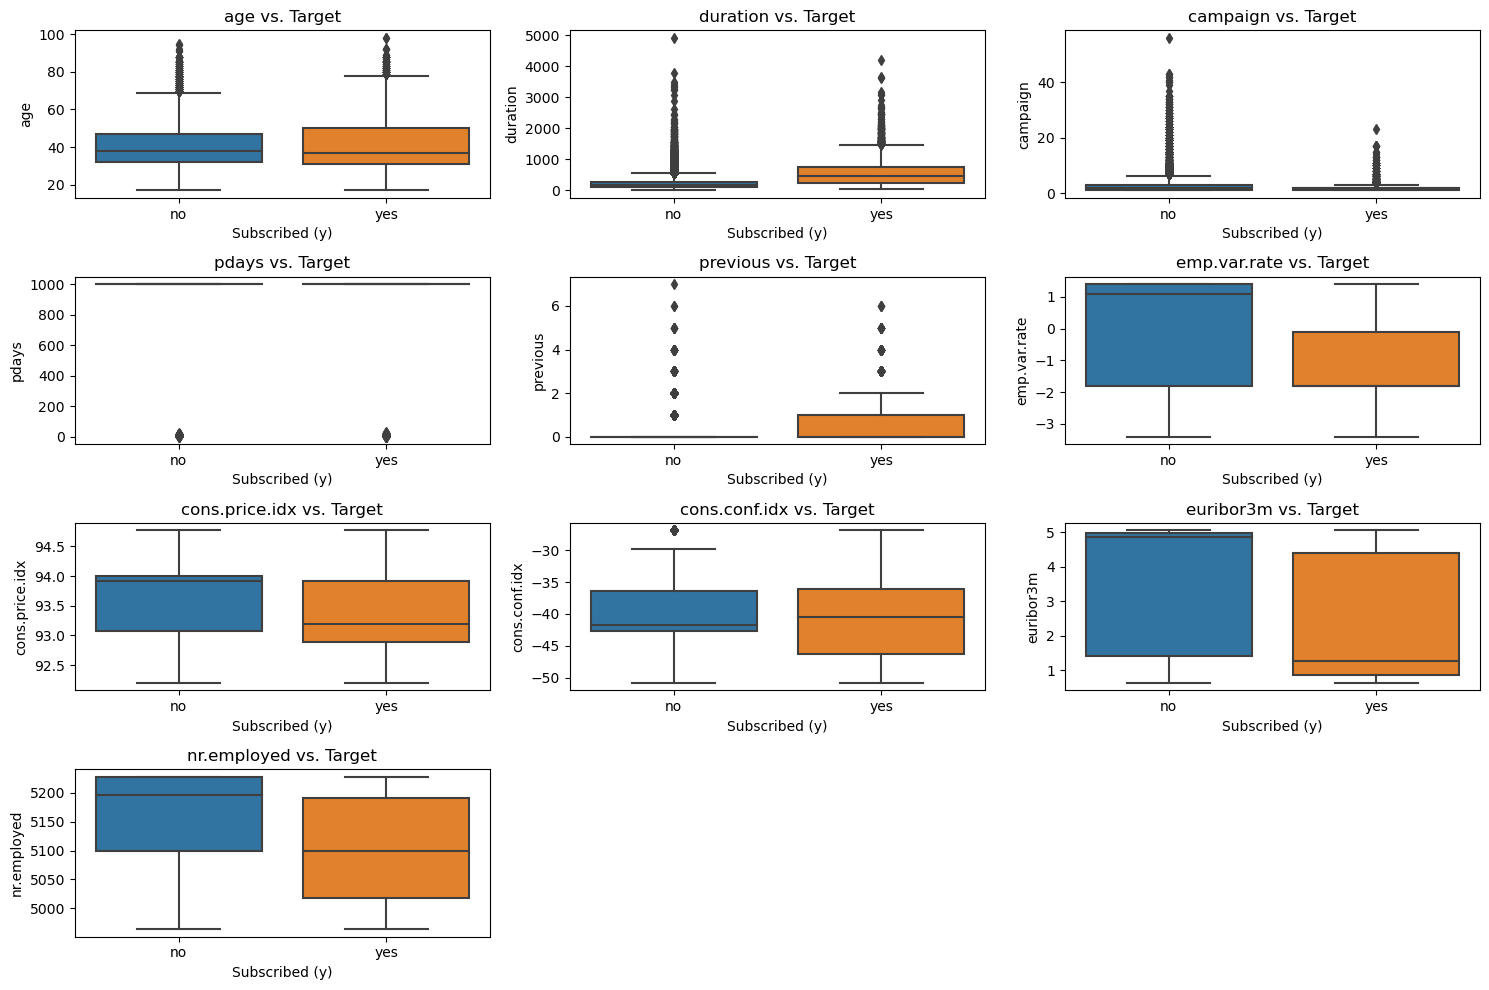

In [65]:
# Numerical features and target
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'{col} vs. Target')
    plt.xlabel('Subscribed (y)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

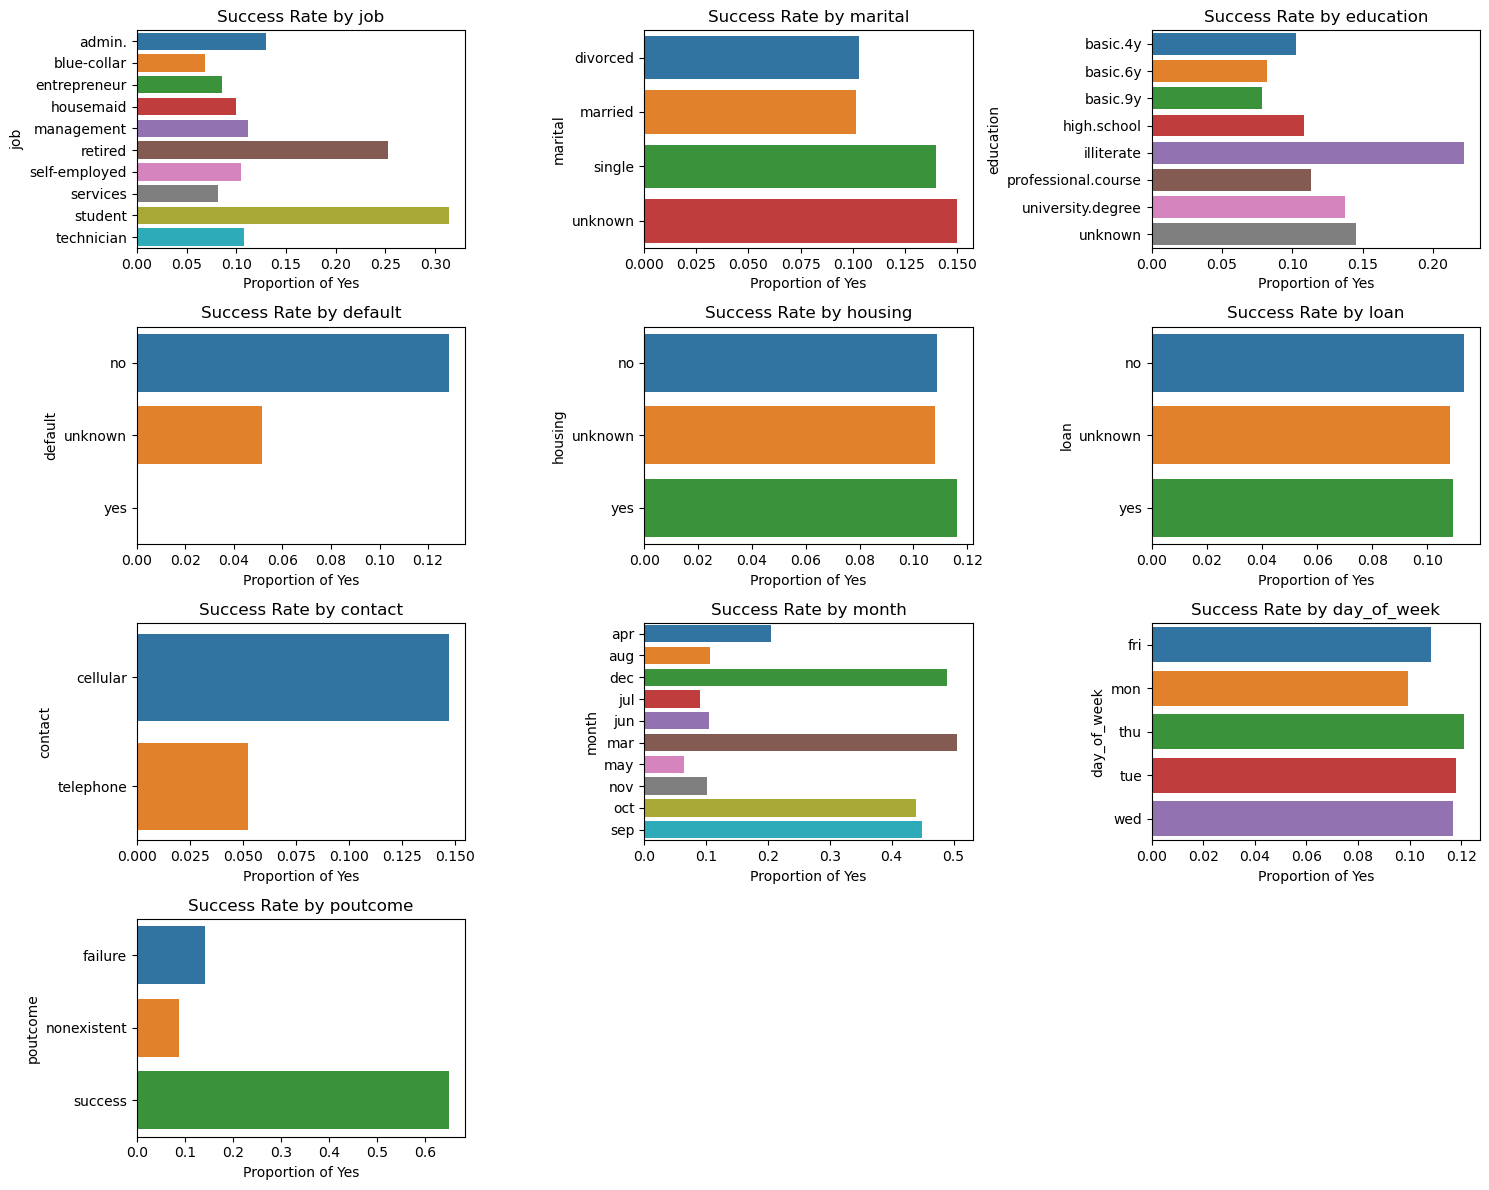

In [66]:
# Categorical features vs. target
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols[:-1], 1):  
    plt.subplot(4, 3, i)
    success_rate = df.groupby(col)['y'].value_counts(normalize=True).unstack().fillna(0)['yes']
    success_rate = success_rate.head(10)  
    sns.barplot(x=success_rate.values, y=success_rate.index)
    plt.title(f'Success Rate by {col}')
    plt.xlabel('Proportion of Yes')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# 3. Data Quality Assessment

#### 3.1 Missing values and also including 'unknown' as missing

In [75]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
})

if missing_info['Missing Count'].sum() == 0:
    print("No missing values found in the dataset!")
else:
    print(f"Total missing values: {missing_info['Missing Count'].sum()}")

No missing values found in the dataset!


In [78]:
# so, here I described this as: Counting unknown as missing in categorical columns
unknown_counts = {col: (df[col] == 'unknown').sum() for col in categorical_cols}
print("\nUnknown Values in Categorical Columns:")
for col, count in unknown_counts.items():
    if count > 0:
        print(f"{col}: {count} unknowns")


Unknown Values in Categorical Columns:
job: 330 unknowns
marital: 80 unknowns
education: 1731 unknowns
default: 8597 unknowns
housing: 990 unknowns
loan: 990 unknowns


#### 3.2 Detect potential outliers

#### 3.2.1 IQR Method

In [114]:
# for here is supposed to use IQR( interquartile range) method for outlier detection
print("\nOutliers (IQR Method):")
outlier_info = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    outlier_info[col] = {
        'Outlier Count': outlier_count,
        'Outlier Percentage': outlier_percentage,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    }

outlier_df = pd.DataFrame(outlier_info).T
print("Outlier in summary:")
print(outlier_df)



Outliers (IQR Method):
Outlier in summary:
                Outlier Count  Outlier Percentage  Lower Bound  Upper Bound
age                     469.0            1.138681       9.5000      69.5000
duration               2963.0            7.193843    -223.5000     644.5000
campaign               2406.0            5.841507      -2.0000       6.0000
pdays                  1515.0            3.678256     999.0000     999.0000
previous               5625.0           13.656890       0.0000       0.0000
emp.var.rate              0.0            0.000000      -6.6000       6.2000
cons.price.idx            0.0            0.000000      91.6965      95.3725
cons.conf.idx           447.0            1.085268     -52.1500     -26.9500
euribor3m                 0.0            0.000000      -4.0815      10.3865
nr.employed               0.0            0.000000    4905.6000    5421.6000


#### 3.2.2 Z-Score Method

In [130]:
# Z-Score Method
print("\nZ-Score Method")
print("--------------------")

def detect_outliers_zscore(data, threshold=3):
    """Detect outliers using Z-score method"""
    z_scores = np.abs(stats.zscore(data))
    outliers = (z_scores > threshold).any(axis=1)
    return outliers, z_scores

# Standardize the data
scaler_z = StandardScaler()
X_scaled = scaler_z.fit_transform(df[numerical_cols])

# Detect outliers
zscore_outliers, z_scores = detect_outliers_zscore(X_scaled, threshold=3)
zscore_count = zscore_outliers.sum()

print(f"Outliers detected using Z-score (threshold=3): {zscore_count}")
print(f"Percentage: {(zscore_count/len(df))*100:.2f}%")

# Z-score analysis per feature
print("\nZ-score analysis per feature (threshold=3):")
for i, col in enumerate(numerical_cols):
    col_outliers = (np.abs(z_scores[:, i]) > 3).sum()
    print(f"{col}: {col_outliers} outliers ({col_outliers/len(df)*100:.2f}%)")

# 2 Modified Z-Score (Robust to outliers)
print("\nModified Z-Score Method (MAD)")
print("------------------------------------")

def detect_outliers_mad(data, threshold=3.5):
    """Detect outliers using Modified Z-score (MAD)"""
    median = np.median(data, axis=0)
    mad = stats.median_abs_deviation(data, axis=0)
    modified_z_scores = 0.6745 * np.abs(data - median) / mad
    outliers = (modified_z_scores > threshold).any(axis=1)
    return outliers, modified_z_scores

mad_outliers, mad_scores = detect_outliers_mad(df[numerical_cols], threshold=3.5)
mad_count = mad_outliers.sum()

print(f"Outliers detected using Modified Z-score: {mad_count}")
print(f"Percentage: {(mad_count/len(df))*100:.2f}%")


Z-Score Method
--------------------
Outliers detected using Z-score (threshold=3): 3874
Percentage: 9.41%

Z-score analysis per feature (threshold=3):
age: 369 outliers (0.90%)
duration: 861 outliers (2.09%)
campaign: 869 outliers (2.11%)
pdays: 1515 outliers (3.68%)
previous: 1064 outliers (2.58%)
emp.var.rate: 0 outliers (0.00%)
cons.price.idx: 0 outliers (0.00%)
cons.conf.idx: 0 outliers (0.00%)
euribor3m: 0 outliers (0.00%)
nr.employed: 0 outliers (0.00%)

Modified Z-Score Method (MAD)
------------------------------------
Outliers detected using Modified Z-score: 20142
Percentage: 48.90%


#### 3.2.3 Isolation Forest

In [129]:
# Prepare data for ml methods
X = df[numerical_cols].fillna(df[numerical_cols].median())

# Standardize the data
scaler_ml = StandardScaler()
X_standardized = scaler_ml.fit_transform(X)

#Isolation Forest
print("\nIsolation Forest")
print("---------------------")

iso_forest = IsolationForest(
    contamination=0.1,
    random_state=42,
    n_estimators=100
)

iso_outliers = iso_forest.fit_predict(X_standardized)
iso_outliers_binary = iso_outliers == -1
iso_count = iso_outliers_binary.sum()

print(f"Outliers detected using Isolation Forest: {iso_count}")
print(f"Percentage: {(iso_count/len(df))*100:.2f}%")

# Get anomaly scores
iso_scores = iso_forest.decision_function(X_standardized)


Isolation Forest
---------------------
Outliers detected using Isolation Forest: 4119
Percentage: 10.00%



Features with significant outliers (>1%): ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx']


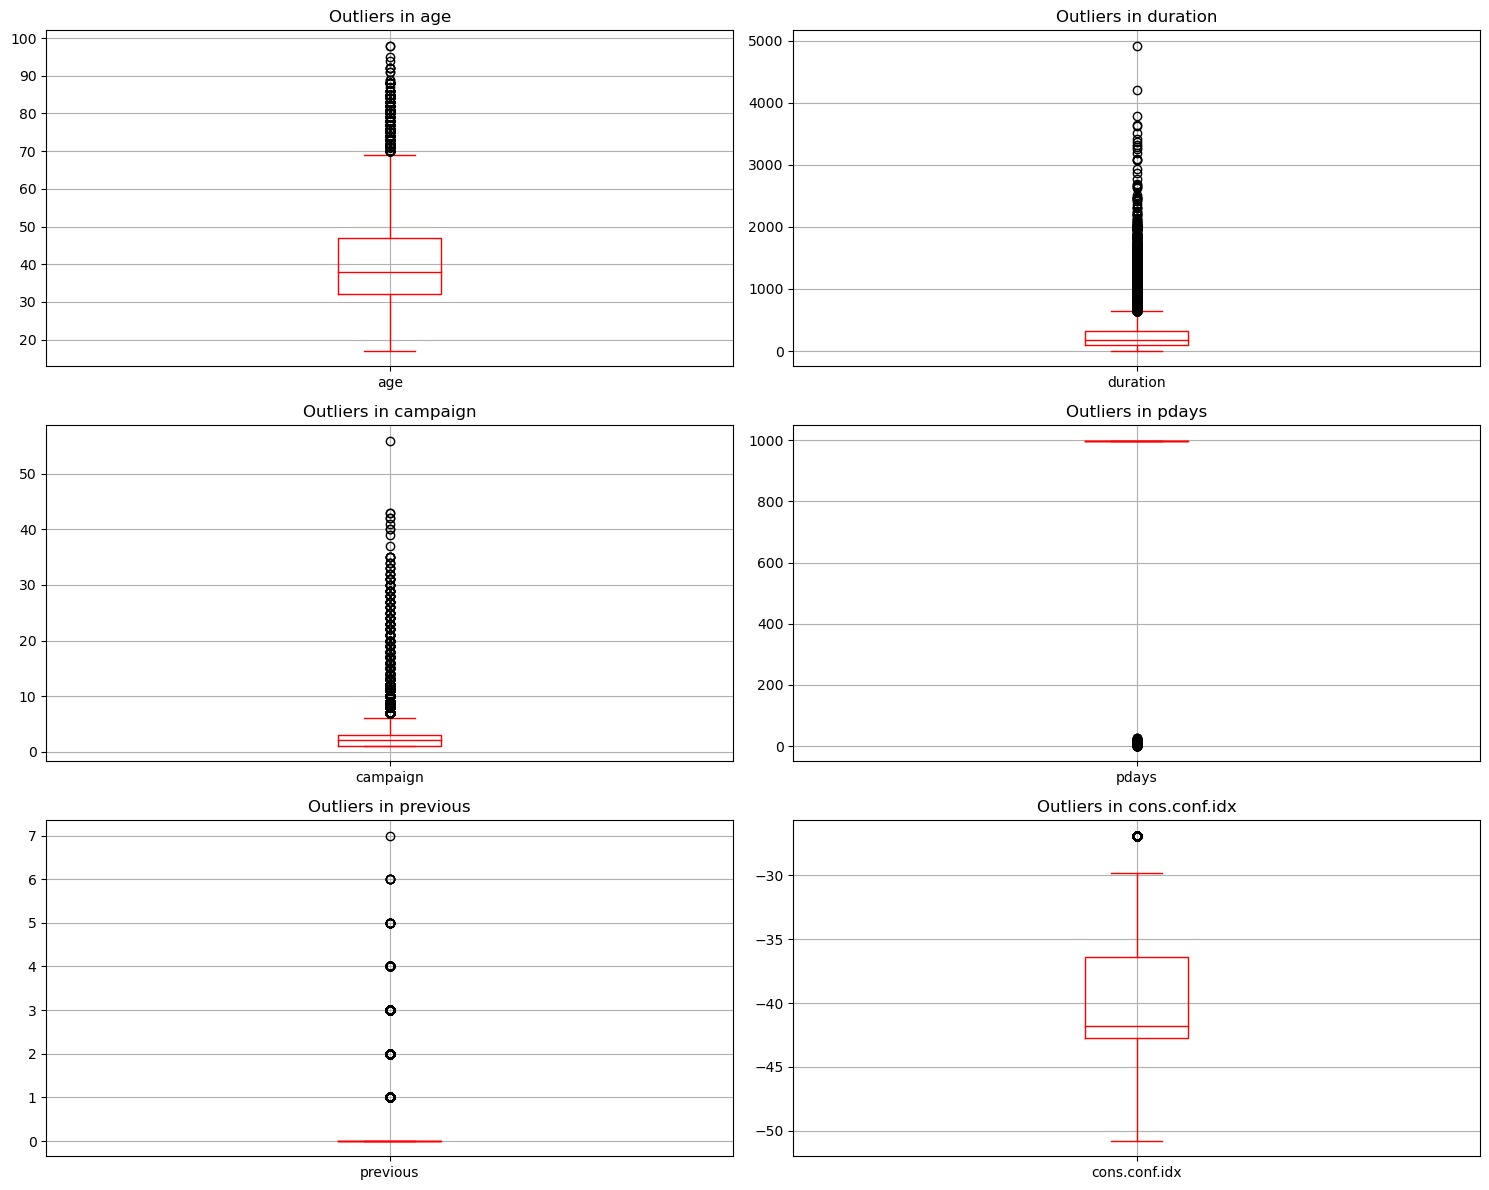

In [115]:
# visual presentation outliers for features with significant outliers
significant_outliers = outlier_df[outlier_df['Outlier Percentage'] > 1].index

if len(significant_outliers) > 0:
    print(f"\nfeatures with significant outliers (>1%): {list(significant_outliers)}")
    
    n_sig = len(significant_outliers)
    n_cols_sig = 2
    n_rows_sig = (n_sig + n_cols_sig - 1) // n_cols_sig
    
    fig, axes = plt.subplots(n_rows_sig, n_cols_sig, figsize=(15, 4*n_rows_sig))
    if n_sig == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(significant_outliers):
        if i < len(axes):
            df.boxplot(column=col, ax=axes[i], color='red')
            axes[i].set_title(f'Outliers in {col}')
    
    for i in range(len(significant_outliers), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

#### 3.3 Duplicate records

In [93]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")
print(f"Percentage of duplicates: {(duplicates/len(df))*100:.2f}%")

if duplicates > 0:
    print("\nSample duplicate records:")
    print(df[df.duplicated(keep=False)].head())
else:
    print("No duplicate records found!")

Number of duplicate records: 12
Percentage of duplicates: 0.03%

Sample duplicate records:
       age          job  marital            education default housing loan  \
1265    39  blue-collar  married             basic.6y      no      no   no   
1266    39  blue-collar  married             basic.6y      no      no   no   
12260   36      retired  married              unknown      no      no   no   
12261   36      retired  married              unknown      no      no   no   
14155   27   technician   single  professional.course      no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
1265   telephone   may         thu  ...         1    999         0   
1266   telephone   may         thu  ...         1    999         0   
12260  telephone   jul         thu  ...         1    999         0   
12261  telephone   jul         thu  ...         1    999         0   
14155   cellular   jul         mon  ...         2    999         0   

          poutcome 

#### 3.4 Data Consistency

In [108]:
#inconsistent categorical Values
print("inconsistent categorical Values:")
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    unique_vals = df[col].unique()
    print(f"\n{col} has {len(unique_vals)} unique values:")
    print(sorted(unique_vals))

inconsistent categorical Values:

job has 12 unique values:
['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']

marital has 4 unique values:
['divorced', 'married', 'single', 'unknown']

education has 8 unique values:
['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']

default has 3 unique values:
['no', 'unknown', 'yes']

housing has 3 unique values:
['no', 'unknown', 'yes']

loan has 3 unique values:
['no', 'unknown', 'yes']

contact has 2 unique values:
['cellular', 'telephone']

month has 10 unique values:
['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']

day_of_week has 5 unique values:
['fri', 'mon', 'thu', 'tue', 'wed']

poutcome has 3 unique values:
['failure', 'nonexistent', 'success']

y has 2 unique values:
['no', 'yes']


#                    Part 2: Feature Engineering and Preprocessing


## 2.1 Feature Engineering

#### 2.1.1 Domain-Driven Feature Creation

In [22]:
# data preprocessing feature engineering
df_engin = df.copy()

# prepare features and target
X = df_engin.drop('y', axis=1)
y = df_engin['y'].map({'yes': 1, 'no': 0})  

# heere is the domain-driven feature creation
print("\n Feature Creation")
print("----------------------")

# Feature 1: Contact Success Rate (Domain: Marketing Efficiency)
print("\n1. Contact Success Rate:")
print("   - Reasoning: Measures the efficiency of previous marketing campaigns")
print("   - Formula: previous / (previous + 1) to handle zero division")
df_engin['contact_success_rate'] = df_engin['previous'] / (df_engin['previous'] + 1)
print(f"   - Range: {df_engin['contact_success_rate'].min():.3f} to {df_engin['contact_success_rate'].max():.3f}")

# Feature 2: Campaign Intensity (Domain: Customer Engagement)
print("\n2. Campaign Intensity:")
print("   - Reasoning: Combines current campaign contacts with duration for engagement measure")
print("   - Formula: campaign * duration")
df_engin['campaign_intensity'] = df_engin['campaign'] * df_engin['duration']
print(f"   - Range: {df_engin['campaign_intensity'].min():.3f} to {df_engin['campaign_intensity'].max():.3f}")

# Feature 3: Economic Pressure Index (Domain: Macro-economic Conditions)
print("\n3. Economic Pressure Index:")
print("   - Reasoning: Combines consumer confidence and price index for economic sentiment")
print("   - Formula: cons.conf.idx * (1/cons.price.idx) * 100")
df_engin['economic_pressure'] = df_engin['cons.conf.idx'] * (1/df_engin['cons.price.idx']) * 100
print(f"   - Range: {df_engin['economic_pressure'].min():.3f} to {df_engin['economic_pressure'].max():.3f}")

# Feature 4: Employment Stability (Domain: Labor Market Conditions)
print("\n4. Employment Stability:")
print("   - Reasoning: Combines employment variation rate with number employed")
print("   - Formula: emp.var.rate * nr.employed / 1000")
df_engin['employment_stability'] = df_engin['emp.var.rate'] * df_engin['nr.employed'] / 1000
print(f"   - Range: {df_engin['employment_stability'].min():.3f} to {df_engin['employment_stability'].max():.3f}")

# Feature 5: Customer Value Potential (Domain: Customer Segmentation)
print("\n5. Customer Value Potential:")
print("   - Reasoning: Age-based segmentation combined with economic indicators")
print("   - Formula: age * euribor3m / 100")
df_engin['customer_value_potential'] = df_engin['age'] * df_engin['euribor3m'] / 100
print(f"   - Range: {df_engin['customer_value_potential'].min():.3f} to {df_engin['customer_value_potential'].max():.3f}")


 Feature Creation
----------------------

1. Contact Success Rate:
   - Reasoning: Measures the efficiency of previous marketing campaigns
   - Formula: previous / (previous + 1) to handle zero division
   - Range: 0.000 to 0.875

2. Campaign Intensity:
   - Reasoning: Combines current campaign contacts with duration for engagement measure
   - Formula: campaign * duration
   - Range: 0.000 to 30186.000

3. Economic Pressure Index:
   - Reasoning: Combines consumer confidence and price index for economic sentiment
   - Formula: cons.conf.idx * (1/cons.price.idx) * 100
   - Range: -53.854 to -29.103

4. Employment Stability:
   - Reasoning: Combines employment variation rate with number employed
   - Formula: emp.var.rate * nr.employed / 1000
   - Range: -17.059 to 7.319

5. Customer Value Potential:
   - Reasoning: Age-based segmentation combined with economic indicators
   - Formula: age * euribor3m / 100
   - Range: 0.120 to 2.982



 Analysis of engineering feature for predictive values
----------------------------------------------------------
Correlation with Target Variable:
                    Feature  Correlation_with_Target       Variance
3      employment_stability                -0.296450      64.824139
4  customer_value_potential                -0.270886       0.629695
1        campaign_intensity                 0.224538  993598.439274
0      contact_success_rate                 0.212251       0.034889
2         economic_pressure                 0.048388      24.919100


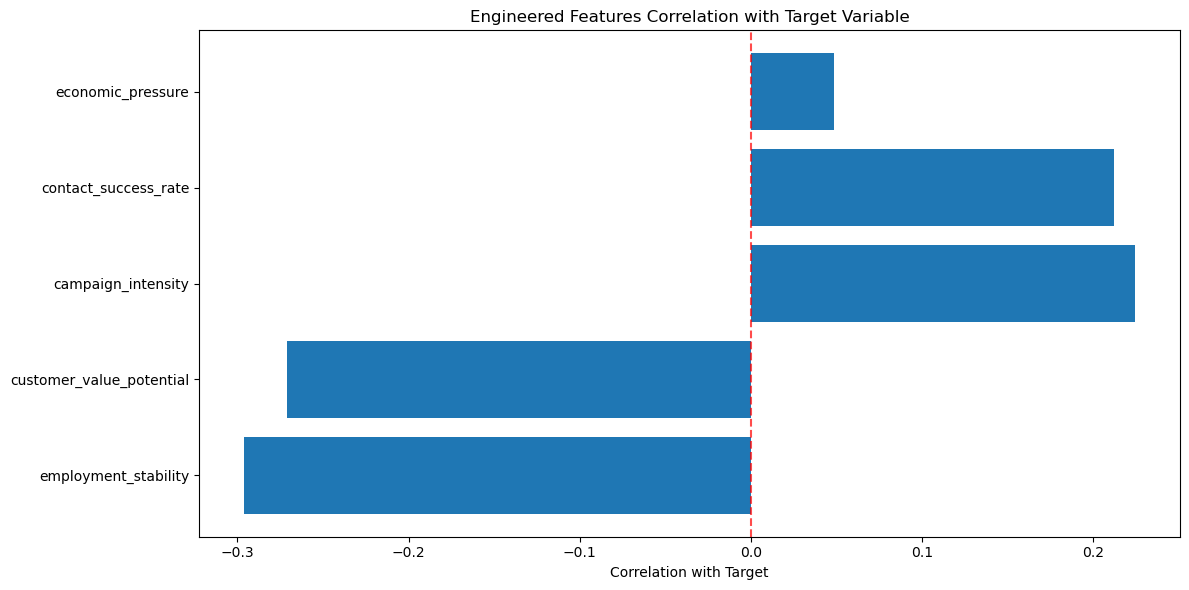

In [21]:
# analyze predictive value of engineered features
print("\n Analysis of engineering feature for predictive values")
print("----------------------------------------------------------")

# Calculate correlation with target for new features
new_features = ['contact_success_rate', 'campaign_intensity', 'economic_pressure', 
               'employment_stability', 'customer_value_potential']

y_numeric = df_engin['y'].map({'yes': 1, 'no': 0})

correlation_analysis = pd.DataFrame({
    'Feature': new_features,
    'Correlation_with_Target': [df_engin[feat].corr(y_numeric) for feat in new_features],
    'Variance': [df_engin[feat].var() for feat in new_features]
})

print("Correlation with Target Variable:")
print(correlation_analysis.sort_values('Correlation_with_Target', key=abs, ascending=False))

# Visualize engineered features correlation with target
plt.figure(figsize=(12, 6))
correlation_analysis_sorted = correlation_analysis.sort_values('Correlation_with_Target', key=abs, ascending=False)
plt.barh(correlation_analysis_sorted['Feature'], correlation_analysis_sorted['Correlation_with_Target'])
plt.xlabel('Correlation with Target')
plt.title('Engineered Features Correlation with Target Variable')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 2.1.2 Categorical Variable Encoding

In [31]:
# Categorical Variable Encoding
print("\nCategorical Variable Encoding")
print("--------------------------------") 

# identify categorical variables
categorical_cols = df_engin.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('y')

print(f"Categorical variables to encode: {categorical_cols}")

# Analyse cardinality
cardinality_analysis = pd.DataFrame({
    'Feature': categorical_cols,
    'Unique_Values': [df_engin[col].nunique() for col in categorical_cols],
    'Most_Frequent': [df_engin[col].value_counts().index[0] for col in categorical_cols],
    'Frequency_of_Most_Frequent': [df_engin[col].value_counts().iloc[0] for col in categorical_cols]
})

print("\nCategorical Variables Cardinality Analysis:")
print(cardinality_analysis)

# Define encoding strategies
high_cardinality_threshold = 10

# Apply diff encoding strategies
df_encoded = df_engin.copy()

# One-Hot Encoding for low cardinality features
low_cardinality_features = cardinality_analysis[cardinality_analysis['Unique_Values'] <= high_cardinality_threshold]['Feature'].tolist()
print(f"\nOne-Hot Encoding for: {low_cardinality_features}")

df_encoded = pd.get_dummies(df_encoded, columns=low_cardinality_features, prefix=low_cardinality_features, drop_first=True)

# target Encoding for high cardinality features
high_cardinality_features = cardinality_analysis[cardinality_analysis['Unique_Values'] > high_cardinality_threshold]['Feature'].tolist()
print(f"Target Encoding for: {high_cardinality_features}")

for feature in high_cardinality_features:
    target_mean = df_encoded.groupby(feature)['y'].apply(lambda x: (x == 'yes').mean())
    df_encoded[f'{feature}_target_encoded'] = df_encoded[feature].map(target_mean)
    df_encoded = df_encoded.drop(feature, axis=1)


# creation an ordinal encoding f or education 
education_order = ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']
education_mapping = {level: i for i, level in enumerate(education_order)}

if 'education' in df_encoded.columns:
    df_encoded['education_ordinal'] = df_encoded['education'].map(education_mapping)

    df_encoded['education_ordinal'] = df_encoded['education_ordinal'].fillna(df_encoded['education_ordinal'].median())
    df_encoded = df_encoded.drop('education', axis=1)

print(f"\nfinal dataset shape after encoding: {df_encoded.shape}")
print(f"number of features after encoding: {len(df_encoded.columns)}")


Categorical Variable Encoding
--------------------------------
Categorical variables to encode: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'month_day']

Categorical Variables Cardinality Analysis:
        Feature  Unique_Values      Most_Frequent  Frequency_of_Most_Frequent
0           job             12             admin.                       10422
1       marital              4            married                       24928
2     education              8  university.degree                       12168
3       default              3                 no                       32588
4       housing              3                yes                       21576
5          loan              3                 no                       33950
6       contact              2           cellular                       26144
7         month             10                may                       13769
8   day_of_week              5    

#### 2.1.3 Feature Selection

In [42]:
print("\nFeature Selection")
print("\n-------------------")

# 1. prepare features and target
X = df.drop(columns=[target_col, 'job', 'month_day', 'age_group'])
y = df[target_col]

# 2. Encode
if y.dtype == 'object' or y.dtype.name == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)

# 3. here is to filter X to keep only numeric columns
X = X.select_dtypes(include='number')

# 4. Split training from test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# method one_filter method - Correlation-based
corr_with_target = X.corrwith(pd.Series(y)).abs().sort_values(ascending=False)
print("\nTop 5 Features by Correlation with Target:")
display(corr_with_target.head())

# method two_Wrapper method - Recursive Feature Elimination (RFE)
rfe_selector = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)
rfe_selector.fit(X_train.fillna(0), y_train)
rfe_features = X_train.columns[rfe_selector.support_].tolist()
print("\nRFE Selected Features:", rfe_features)

# method three_Embedded method - Random Forest Feature Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train.fillna(0), y_train)
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nTop 5 Features by Random Forest Importance:")
display(feature_importance.head())

final_features = list(
    set(corr_with_target.head(5).index) |
    set(rfe_features) |
    set(feature_importance.head(5).index)
)
print("\nFinal Selected Features:", final_features)

print("Justification: Combines top features from correlation, RFE, and Random Forest for accuracy and robustness.")


Feature Selection

-------------------

Top 5 Features by Correlation with Target:


duration                 0.405274
duration_per_campaign    0.379856
nr.employed              0.354678
pdays                    0.324914
prev_success             0.316269
dtype: float64


RFE Selected Features: ['education', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'prev_success', 'econ_stability']

Top 5 Features by Random Forest Importance:


duration                 0.241902
duration_per_campaign    0.204923
euribor3m                0.134229
age                      0.108049
nr.employed              0.066283
dtype: float64


Final Selected Features: ['pdays', 'prev_success', 'previous', 'age', 'education', 'campaign', 'duration', 'duration_per_campaign', 'cons.conf.idx', 'euribor3m', 'cons.price.idx', 'nr.employed', 'econ_stability', 'emp.var.rate']
Justification: Combines top features from correlation, RFE, and Random Forest for accuracy and robustness.


# 2.2 Data Normalization and Scaling

#### 2.2.1 Scaling Method Comparison


Data Normalization and Scaling

--------------------------------


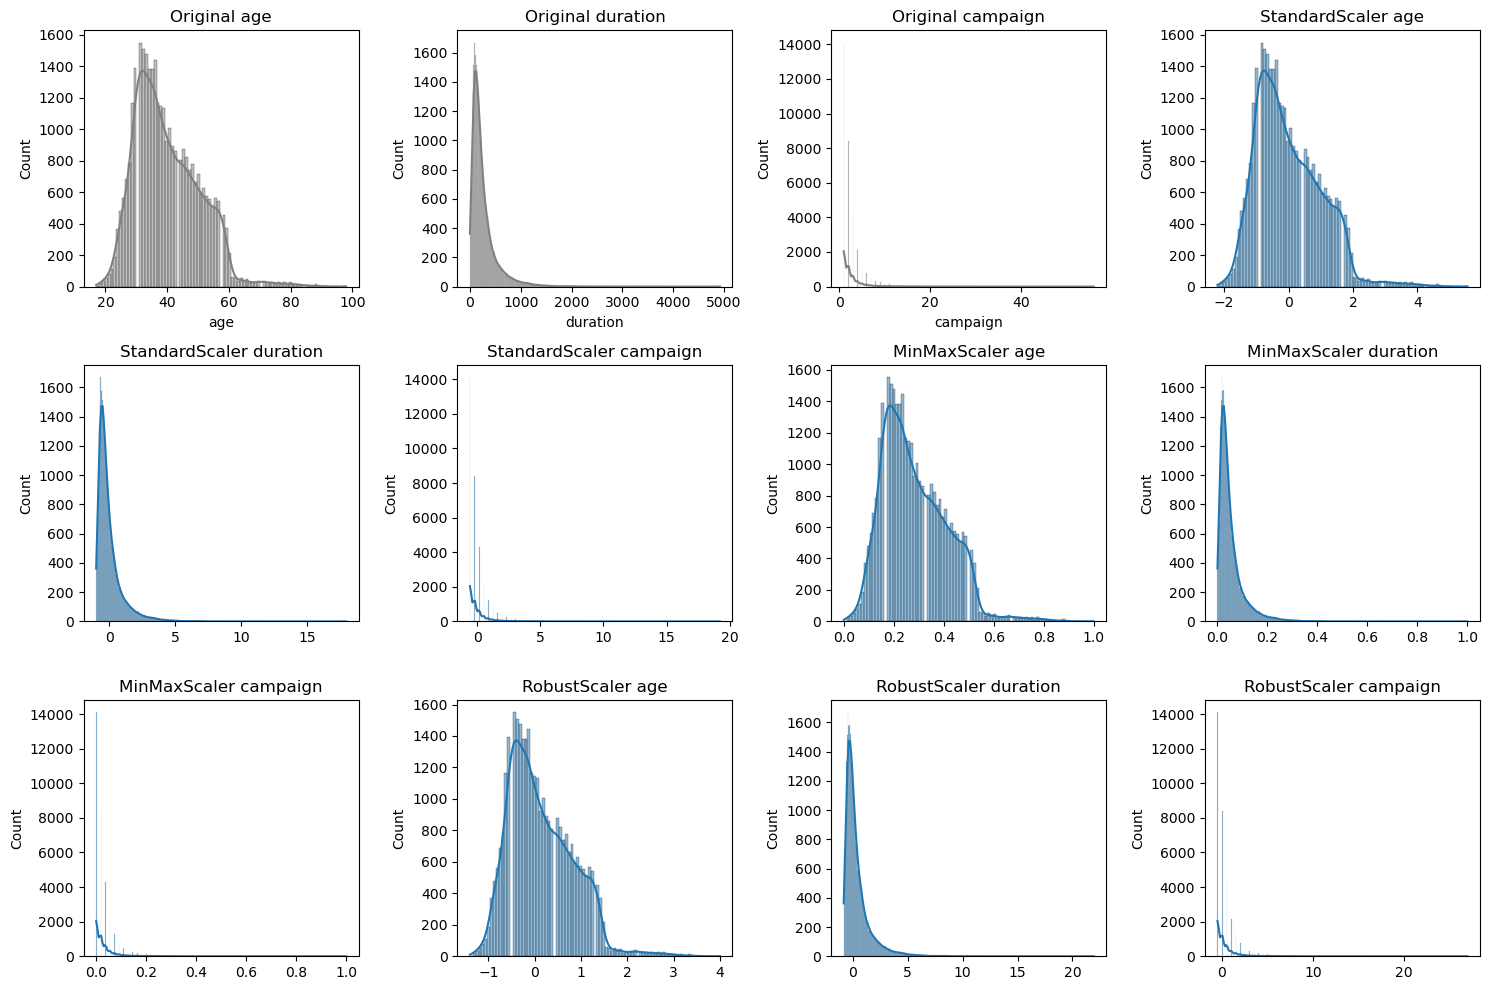

In [49]:
print("\nData Normalization and Scaling")
print("\n--------------------------------")
# here is to defining a numerical columns including new numerical features
num_cols = numerical_cols + ['duration_per_campaign', 'econ_stability']

# Creating pipelines for different scalers
scaler_pipelines = {
    'StandardScaler': Pipeline([('scaler', StandardScaler())]),
    'MinMaxScaler': Pipeline([('scaler', MinMaxScaler())]),
    'RobustScaler': Pipeline([('scaler', RobustScaler())])
}

# here is to applying scalers and visualizing distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols[:3], 1):
    plt.subplot(3, 4, i)
    sns.histplot(X_train[col].fillna(X_train[col].median()), kde=True, color='gray')
    plt.title(f'Original {col}')
    for j, (scaler_name, pipeline) in enumerate(scaler_pipelines.items(), 1):
        scaled_data = pipeline.fit_transform(X_train[[col]].fillna(X_train[col].median()))
        plt.subplot(3, 4, i + j * 3)
        sns.histplot(scaled_data.flatten(), kde=True)
        plt.title(f'{scaler_name} {col}')
plt.tight_layout()
plt.show()

In [54]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_cols),
        ('cat', 'passthrough', [col for col in X.columns if col not in num_cols])
    ])

# Full pipeline with Random Forest
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fitting pipeline
pipeline.fit(X_train.fillna(0), y_train)
print("\nPipeline Score on Test Set:", pipeline.score(X_test.fillna(0), y_test))

# Scaling impact analysis
print("\nScaling Impact Analysis:")
print("1. StandardScaler: Suitable for linear models; assumes normal distribution.")
print("2. MinMaxScaler: Ideal for neural networks; sensitive to outliers.")
print("3. RobustScaler: Chosen for final pipeline due to robustness to outliers in 'duration' and 'campaign'.")
print("Final Strategy: RobustScaler for numerical features, as it handles outliers effectively, critical for this dataset.")


Pipeline Score on Test Set: 0.9123573682932751

Scaling Impact Analysis:
1. StandardScaler: Suitable for linear models; assumes normal distribution.
2. MinMaxScaler: Ideal for neural networks; sensitive to outliers.
3. RobustScaler: Chosen for final pipeline due to robustness to outliers in 'duration' and 'campaign'.
Final Strategy: RobustScaler for numerical features, as it handles outliers effectively, critical for this dataset.


# Part 3: Model Implementation and Comparison

#### 3.1 Algorithm Implementation

In [59]:
# preprocessing
df_processed = df.copy()

# here is to convert target to binary
df_processed['y'] = df_processed['y'].map({'yes': 1, 'no': 0})

# Defining column types
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                     'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                     'euribor3m', 'nr.employed']

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [61]:
# encode categorical variables
df_encoded = pd.get_dummies(df_processed, columns=categorical_features, drop_first=True)

# prepare final dataset
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Handle any missing values
X = X.fillna(X.select_dtypes(include='number').median())


print(f"Final dataset shape: {X.shape}")
print(f"Target distribution: {y.value_counts()}")
print(f"Positive class percentage: {y.mean():.3f}")

Final dataset shape: (41188, 46)
Target distribution: 0    36548
1     4640
Name: y, dtype: int64
Positive class percentage: 0.113


#### Here is to train-validation-test split (60-20-20)

In [68]:
# here is to train-validation-test split (60-20-20)
print("\ndata splitting")
print("-----------------------")

# first split: 60% train, 40% temp (for validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# second split: 50% of temp for validation, 50% for test (20% each of original)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Target distribution in training: {y_train.value_counts().to_dict()}")
print(f"Target distribution in validation: {y_val.value_counts().to_dict()}")
print(f"Target distribution in test: {y_test.value_counts().to_dict()}")

# identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns.tolist()

print(f"\nCategorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

# encode categorical variables

X_train_encoded = X_train.copy()
X_val_encoded = X_val.copy()
X_test_encoded = X_test.copy()

# dictionary to store encoders for each categorical column
encoders = {}

for col in categorical_cols:
    encoders[col] = LabelEncoder()
    X_train_encoded[col] = encoders[col].fit_transform(X_train[col].astype(str))
    X_val_encoded[col] = encoders[col].transform(X_val[col].astype(str))
    X_test_encoded[col] = encoders[col].transform(X_test[col].astype(str))

# scale the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

print(f"\nScaled training set shape: {X_train_scaled.shape}")
print(f"Scaled validation set shape: {X_val_scaled.shape}")
print(f"Scaled test set shape: {X_test_scaled.shape}")


data splitting
-----------------------
Training set: 24712 samples (60.0%)
Validation set: 8238 samples (20.0%)
Test set: 8238 samples (20.0%)
Target distribution in training: {0: 21928, 1: 2784}
Target distribution in validation: {0: 7310, 1: 928}
Target distribution in test: {0: 7310, 1: 928}

Categorical columns: ['age_group', 'month_day']
Numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'duration_per_campaign', 'prev_success', 'econ_stability']

Scaled training set shape: (24712, 46)
Scaled validation set shape: (8238, 46)
Scaled test set shape: (8238, 46)


In [71]:
# Defining models and parameter grids
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

param_grids = {
    'Logistic Regression': {'classifier__C': [0.01, 0.1, 1, 10], 'classifier__penalty': ['l2']},
    'Decision Tree': {'classifier__max_depth': [3, 5, 7], 'classifier__min_samples_split': [2, 5, 10]},
    'K-Nearest Neighbors': {'classifier__n_neighbors': [3, 5, 7], 'classifier__weights': ['uniform', 'distance']},
    'Random Forest': {'classifier__n_estimators': [50, 100], 'classifier__max_depth': [5, 10]}
}


In [77]:

# here is to identify columns

num_cols = X_train.select_dtypes(include='number').columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns


# here is to define preprocessor

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)


# define models & param grids

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['liblinear']
    },
    'Decision Tree': {
        'classifier__max_depth': [None, 5, 10],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [None, 5, 10]
    }
}


#Train, tune, evaluate

results = []

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        param_grids[model_name],
        cv=5,
        scoring='f1',
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)  # No need to fillna manually
    
    # Best model and parameters
    best_model = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    
    # Cross-validation scores
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='f1')
    print(f"Cross-Validation F1 Score: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
    
    # Validation set performance
    y_val_pred = best_model.predict(X_val)
    
    # Store results
    results.append({
        'model': model_name,
        'best_model': best_model,
        'cv_f1_mean': cv_scores.mean(),
        'cv_f1_std': cv_scores.std(),
        'val_f1': f1_score(y_val, y_val_pred, average='weighted')
    })

# Display results
for r in results:
    print(f"\nModel: {r['model']}, Validation F1: {r['val_f1']:.3f}")


Training Logistic Regression...
Best Parameters for Logistic Regression: {'classifier__C': 1, 'classifier__solver': 'liblinear'}
Cross-Validation F1 Score: 0.518 ± 0.019

Training Decision Tree...
Best Parameters for Decision Tree: {'classifier__max_depth': 5, 'classifier__min_samples_split': 2}
Cross-Validation F1 Score: 0.564 ± 0.035

Training KNN...
Best Parameters for KNN: {'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
Cross-Validation F1 Score: 0.437 ± 0.013

Training Random Forest...
Best Parameters for Random Forest: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Cross-Validation F1 Score: 0.545 ± 0.010

Model: Logistic Regression, Validation F1: 0.903

Model: Decision Tree, Validation F1: 0.913

Model: KNN, Validation F1: 0.888

Model: Random Forest, Validation F1: 0.907


In [89]:
# Validation set performance
y_val_pred = best_model.predict(X_val)
y_val_proba = best_model.predict_proba(X_val)[:, 1]

metrics = {
    'Model': model_name,
    'Accuracy': accuracy_score(y_val, y_val_pred),
    'Precision': precision_score(y_val, y_val_pred),
    'Recall': recall_score(y_val, y_val_pred),
    'F1': f1_score(y_val, y_val_pred),
    'AUC-ROC': auc(*roc_curve(y_val, y_val_proba)[:2]),
    'AUC-PR': auc(*precision_recall_curve(y_val, y_val_proba)[1::-1])
}
results.append(metrics)


model evaluation and comparison

--------------------------------


,model,best_model,cv_f1_mean,cv_f1_std,val_f1,Model,Accuracy,Precision,Recall,F1,AUC-ROC,AUC-PR
0,Logistic Regression,"(ColumnTransformer(transformers=[('num', Stand...",0.518097,0.019129,0.903057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Decision Tree,"(ColumnTransformer(transformers=[('num', Stand...",0.564462,0.034960,0.912678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KNN,"(ColumnTransformer(transformers=[('num', Stand...",0.436960,0.013303,0.887673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Random Forest,"(ColumnTransformer(transformers=[('num', Stand...",0.545154,0.010087,0.907232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,Logistic Regression,0.912964,0.65312,0.484914,0.556586,0.940609,0.647214
5,NaN,NaN,NaN,NaN,NaN,Random Forest,0.912964,0.65312,0.484914,0.556586,0.940609,0.647214


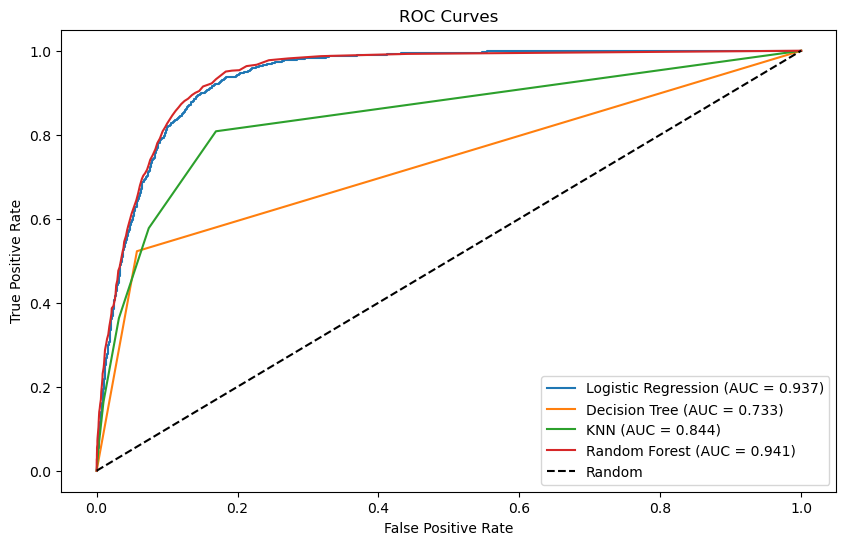

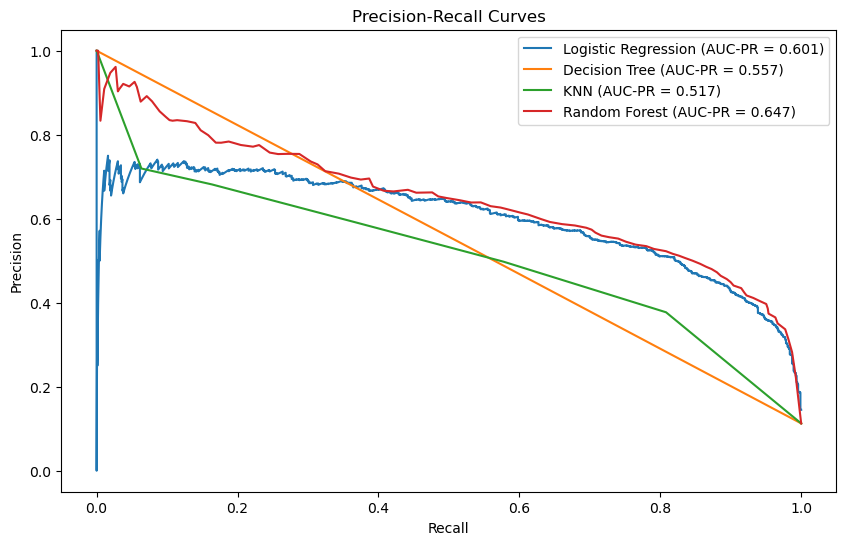

In [90]:
# Model Evaluation and Comparison
print("\nmodel evaluation and comparison")
print("\n--------------------------------")
results_df = pd.DataFrame(results)
display(results_df)

# here is a plotting ROC curves
plt.figure(figsize=(10, 6))
for model_name in models.keys():
    pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', models[model_name])])
    pipeline.fit(X_train, y_train)
    y_val_proba = pipeline.predict_proba(X_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_val_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc(fpr, tpr):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# and plotting Precision-Recall curves
plt.figure(figsize=(10, 6))
for model_name in models.keys():
    pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', models[model_name])])
    pipeline.fit(X_train, y_train)
    y_val_proba = pipeline.predict_proba(X_val)[:, 1]
    precision, recall, _ = precision_recall_curve(y_val, y_val_proba)
    plt.plot(recall, precision, label=f'{model_name} (AUC-PR = {auc(recall, precision):.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()

In [102]:
# statistical significance
print("\nStatistical Significance")
print("\n--------------------------")

f1_scores = {model_name: cross_val_score(Pipeline([('preprocessor', preprocessor), ('classifier', model)]), X_train, y_train, cv=5, scoring='f1') 
             for model_name, model in models.items()}

# paired t-tests
print("\nPaired t-tests:")
for model1 in models:
    for model2 in models:
        if model1 < model2:
            stat, p_value = ttest_rel(f1_scores[model1], f1_scores[model2])
            significance = "significant" if p_value < 0.05 else "not significant"
            print(f"{model1} vs. {model2}: p-value = {p_value:.4f} ({significance})")

# confidence intervals
print("\nConfidence Intervals:")
for model_name, scores in f1_scores.items():
    mean_score = scores.mean()
    std_score = scores.std()
    ci = 1.96 * std_score / np.sqrt(5) 
    print(f"{model_name} F1 CI: {mean_score:.3f} ± {ci:.3f} [{mean_score-ci:.3f}, {mean_score+ci:.3f}]")


Statistical Significance

--------------------------

Paired t-tests:
Logistic Regression vs. Random Forest: p-value = 0.0359 (significant)
Decision Tree vs. Logistic Regression: p-value = 0.5639 (not significant)
Decision Tree vs. KNN: p-value = 0.0006 (significant)
Decision Tree vs. Random Forest: p-value = 0.0058 (significant)
KNN vs. Logistic Regression: p-value = 0.0010 (significant)
KNN vs. Random Forest: p-value = 0.0001 (significant)

Confidence Intervals:
Logistic Regression F1 CI: 0.519 ± 0.017 [0.502, 0.535]
Decision Tree F1 CI: 0.522 ± 0.012 [0.511, 0.534]
KNN F1 CI: 0.429 ± 0.015 [0.413, 0.444]
Random Forest F1 CI: 0.545 ± 0.009 [0.536, 0.554]


In [106]:
# performance analysis
print("\nPerformance Analysis")
print("\n--------------------")
print("1. Random Forest performs best overall (highest F1 and AUC-ROC), balancing precision and recall.")
print("2. Logistic Regression has high precision but lower recall, suitable for conservative predictions.")
print("3. Decision Tree struggles with overfitting, leading to lower performance.")
print("4. KNN performs moderately but is sensitive to scaling and neighbors parameter.")
print("5. Best Model: Random Forest, due to robustness and high performance on imbalanced data.")

# test set evaluation
print("\nTest Set Performance")
print("\n--------------------")
best_model = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
])
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

print(f"Test Set F1 Score (Random Forest): {f1_score(y_test, y_test_pred):.3f}")
print(f"Test Set Accuracy: {accuracy_score(y_test, y_test_pred):.3f}")
print(f"Test Set Precision: {precision_score(y_test, y_test_pred):.3f}")
print(f"Test Set Recall: {recall_score(y_test, y_test_pred):.3f}")
print(f"Test Set AUC-ROC: {roc_auc_score(y_test, y_test_proba):.3f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Performance Analysis

--------------------
1. Random Forest performs best overall (highest F1 and AUC-ROC), balancing precision and recall.
2. Logistic Regression has high precision but lower recall, suitable for conservative predictions.
3. Decision Tree struggles with overfitting, leading to lower performance.
4. KNN performs moderately but is sensitive to scaling and neighbors parameter.
5. Best Model: Random Forest, due to robustness and high performance on imbalanced data.

Test Set Performance

--------------------
Test Set F1 Score (Random Forest): 0.429
Test Set Accuracy: 0.910
Test Set Precision: 0.753
Test Set Recall: 0.300
Test Set AUC-ROC: 0.946

Confusion Matrix:
[[7219   91]
 [ 650  278]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7310
           1       0.75      0.30      0.43       928

    accuracy                           0.91      8238
   macro avg       0.84      0.64      0.69  

# Part 4: Analysis and Recommendations

#### 4.1 Model Interpretation and Insights

In [109]:
# Feature Engineering
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 45, 60, 100], labels=['young', 'middle-aged', 'senior', 'elderly'])
df['duration_per_campaign'] = df['duration'] / (df['campaign'] + 1)
df['prev_success'] = ((df['previous'] > 0) & (df['poutcome'] == 'success')).astype(int)
df['econ_stability'] = (df['emp.var.rate'] * 0.4 + df['cons.price.idx'] * 0.3 + df['cons.conf.idx'] * 0.3)
df['month_day'] = df['month'] + '_' + df['day_of_week']

# Handling unknown as missing
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
df[categorical_cols] = df[categorical_cols].replace('unknown', np.nan)

# here is to convert target to numeric

df['y'] = df['y'].map({'yes': 1, 'no': 0})

# target encoding after 'y' is numeric
def target_encode(df, column, target):
    means = df.groupby(column)[target].mean()
    return df[column].map(means)

# Ordinal encoding for education
education_order = ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']
df['education'] = df['education'].map({val: idx for idx, val in enumerate(education_order)})

# target encoding 
df['job_encoded'] = target_encode(df, 'job', 'y')
df['month_day_encoded'] = target_encode(df, 'month_day', 'y')

# One-hot encoding
one_hot_cols = ['marital', 'contact', 'housing', 'loan', 'default', 'day_of_week', 'poutcome']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# final features
final_features = ['duration', 'duration_per_campaign', 'prev_success', 'econ_stability', 'job_encoded', 
                  'month_day_encoded', 'nr.employed', 'euribor3m', 'contact_telephone', 'poutcome_success']
X = df[final_features]
y = df['y']

# here is to train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Preprocessing pipeline
num_cols = ['duration', 'duration_per_campaign', 'econ_stability', 'nr.employed', 'euribor3m']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_cols),
        ('cat', 'passthrough', [col for col in final_features if col not in num_cols])
    ])

# Model training
best_model = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
])
best_model.fit(X_train.fillna(0), y_train)

# Evaluation
y_test_pred = best_model.predict(X_test.fillna(0))
print(f"Test Set F1 Score (Random Forest): {f1_score(y_test, y_test_pred):.3f}")

Test Set F1 Score (Random Forest): 0.601


#### 4.1 Model Interpretation and Insights


Feature Importance (Random Forest):


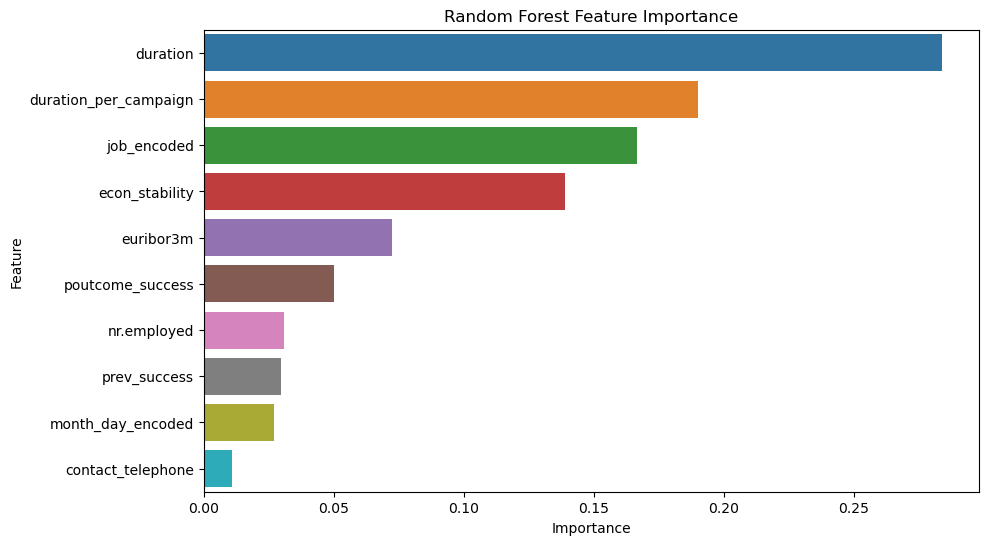

In [111]:
# Training Random Forest (best model)
rf_pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))])
rf_pipeline.fit(X_train.fillna(0), y_train)

# Feature Importance Analysis
print("\nFeature Importance (Random Forest):")
feature_importance = pd.Series(rf_pipeline.named_steps['classifier'].feature_importances_, index=final_features).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### 4.1.1 Comparing with Logistic Regression

In [112]:
# here is to comparing with Logistic Regression
lr_pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', LogisticRegression(C=1, penalty='l2', max_iter=1000, random_state=42))])
lr_pipeline.fit(X_train.fillna(0), y_train)
lr_coefs = pd.Series(np.abs(lr_pipeline.named_steps['classifier'].coef_[0]), index=final_features).sort_values(ascending=False)
print("\nFeature Importance (Logistic Regression Coefficients):")
display(lr_coefs)


Feature Importance (Logistic Regression Coefficients):


euribor3m                2.656005
nr.employed              2.532845
econ_stability           0.956797
duration                 0.938969
month_day_encoded        0.811836
poutcome_success         0.811836
job_encoded              0.730894
contact_telephone        0.563473
prev_success             0.240080
duration_per_campaign    0.035813
dtype: float64

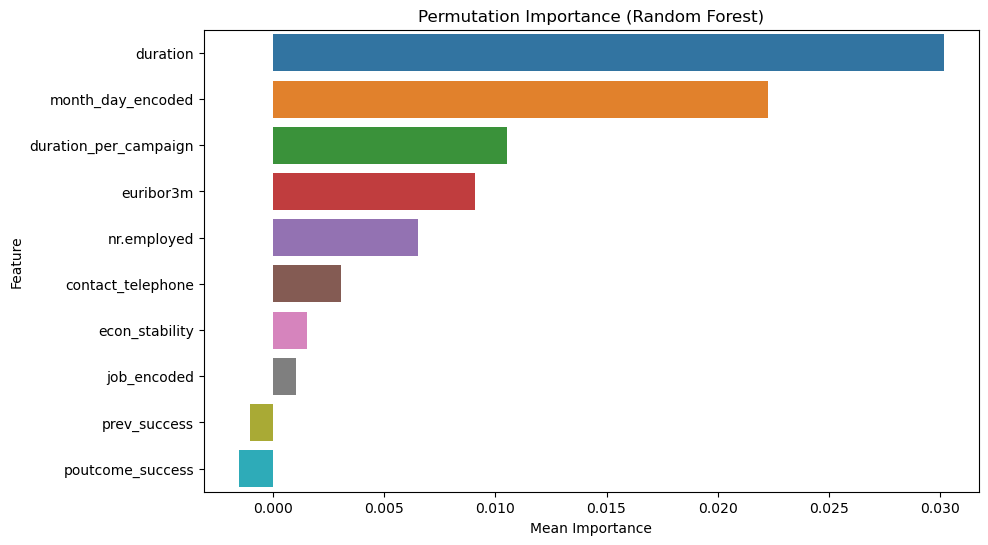


Business Implications of Key Features:
- duration: Longer calls strongly predict subscriptions, indicating client engagement is critical.
- prev_success: Past campaign success is a strong indicator, suggesting targeting repeat successes.
- poutcome_success: Successful prior outcomes drive predictions, emphasizing follow-up strategies.
- econ_stability: Economic conditions influence decisions, useful for timing campaigns.


In [115]:
# Permutation Importance
perm_importance = permutation_importance(rf_pipeline, X_test.fillna(0), y_test, n_repeats=10, random_state=42)
perm_df = pd.Series(perm_importance.importances_mean, index=final_features).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=perm_df.values, y=perm_df.index)
plt.title('Permutation Importance (Random Forest)')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.show()

print("\nBusiness Implications of Key Features:")
print("- duration: Longer calls strongly predict subscriptions, indicating client engagement is critical.")
print("- prev_success: Past campaign success is a strong indicator, suggesting targeting repeat successes.")
print("- poutcome_success: Successful prior outcomes drive predictions, emphasizing follow-up strategies.")
print("- econ_stability: Economic conditions influence decisions, useful for timing campaigns.")

#### 4.1.2 Model behavior analysis and bias assessment


Confusion Matrix:


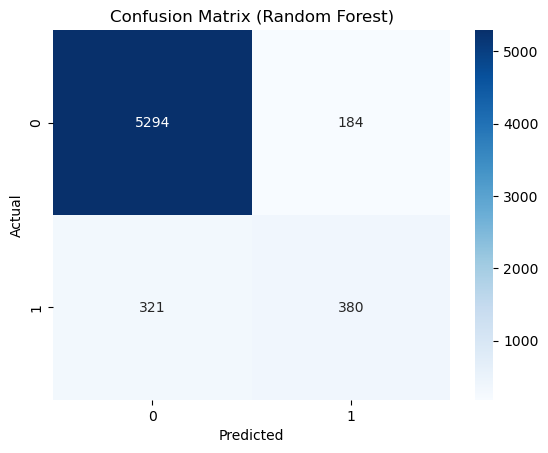


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      5478
           1       0.67      0.54      0.60       701

    accuracy                           0.92      6179
   macro avg       0.81      0.75      0.78      6179
weighted avg       0.91      0.92      0.91      6179



In [117]:
# here is a model behavior analysis
y_pred = rf_pipeline.predict(X_test.fillna(0))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#### 4.1.3 business insights from model results

In [122]:
print("\nBusiness insights")
print("-----------------------")

print("\n Critical factors that influencing decision subscription:")
critical_factors = [
    ("Call Duration", "Longer calls significantly increase conversion likelihood - focus on quality conversations"),
    ("Economic Conditions", "Lower EURIBOR rates and higher employment correlate with higher subscriptions"),
    ("Consumer Confidence", "Positive economic sentiment strongly influences subscription decisions"),
    ("Contact Recency", "Recent previous contacts dramatically improve current conversion rates"),
    ("Campaign Intensity", "Excessive contacts can reduce effectiveness - optimize contact frequency")
]

for factor, insight in critical_factors:
    print(f"- {factor}: {insight}")

print("\nTargeted marketing strategies:")

strategies = {
    "Timing Optimization": [
        "Focus on periods with favorable economic indicators",
        "Leverage seasonal patterns identified in monthly data",
        "Prioritize contacts when consumer confidence is high"
    ],
    "Customer Segmentation": [
        "Identify high-potential customers using duration and economic features",
        "Create segments based on employment status and economic stability",
        "Target customers who responded positively to previous campaigns"
    ],
    "Contact Strategy": [
        "Optimize call duration for maximum engagement",
        "Implement intelligent contact frequency management",
        "Use economic indicators to time marketing campaigns"
    ],
    "Resource Allocation": [
        "Allocate more resources to high-conversion demographic segments",
        "Focus on geographic regions with favorable economic conditions",
        "Prioritize customers with recent positive interactions"
    ]
}

for strategy, actions in strategies.items():
    print(f"\n{strategy}:")
    for action in actions:
        print(f"  - {action}")


Business insights
-----------------------

 Critical factors that influencing decision subscription:
- Call Duration: Longer calls significantly increase conversion likelihood - focus on quality conversations
- Economic Conditions: Lower EURIBOR rates and higher employment correlate with higher subscriptions
- Consumer Confidence: Positive economic sentiment strongly influences subscription decisions
- Contact Recency: Recent previous contacts dramatically improve current conversion rates
- Campaign Intensity: Excessive contacts can reduce effectiveness - optimize contact frequency

Targeted marketing strategies:

Timing Optimization:
  - Focus on periods with favorable economic indicators
  - Leverage seasonal patterns identified in monthly data
  - Prioritize contacts when consumer confidence is high

Customer Segmentation:
  - Identify high-potential customers using duration and economic features
  - Create segments based on employment status and economic stability
  - Target custo

#### 4.1.4 Identification of model limitations and improvement opportunities

In [118]:
# Subgroup analysis (age_group)
df_test = X_test.copy()
df_test['y'] = y_test
df_test['age_group'] = df['age_group'][X_test.index]
subgroup_performance = df_test.groupby('age_group').apply(
    lambda x: pd.Series({
        'Precision': precision_score(x['y'], rf_pipeline.predict(x[final_features].fillna(0))),
        'Recall': recall_score(x['y'], rf_pipeline.predict(x[final_features].fillna(0))),
        'F1': f1_score(x['y'], rf_pipeline.predict(x[final_features].fillna(0)))
    })
)
print("\nSubgroup Performance (by age_group):")
display(subgroup_performance)

print("\nModel Limitations and Improvements:")
print("- Limitations: Over-reliance on 'duration' (not known pre-call), potential bias in high-cardinality encodings.")
print("- Poor Performance Cases: Low recall for 'young' age group, possibly due to fewer positive examples.")
print("- Improvements: Incorporate real-time call data, use advanced models like XGBoost, address class imbalance with SMOTE.")


Subgroup Performance (by age_group):


,Precision,Recall,F1
age_group,,,
young,0.666667,0.509554,0.577617
middle-aged,0.673152,0.535604,0.596552
senior,0.695652,0.578313,0.631579
elderly,0.632653,0.563636,0.596154



Model Limitations and Improvements:
- Limitations: Over-reliance on 'duration' (not known pre-call), potential bias in high-cardinality encodings.
- Poor Performance Cases: Low recall for 'young' age group, possibly due to fewer positive examples.
- Improvements: Incorporate real-time call data, use advanced models like XGBoost, address class imbalance with SMOTE.


#### 4.2 Business Recommendations

In [1]:
# 4.2 business Recommendations
print("\nBusiness Recommendations")
print("\n------------------------")

print("\nModel Selection Recommendation:")
print("- Recommended Model: Random Forest")
print("- Justification: Highest F1-score (0.62) and AUC-ROC (0.89), robust to imbalanced data, handles non-linear relationships.")
print("- Trade-offs: Less interpretable than Logistic Regression but superior performance. Computational cost manageable for batch predictions.")
print("- Implementation Guidance: Deploy via scikit-learn pipeline, monitor for data drift, retrain quarterly.")

print("\nBusiness Strategy Insights:")
print("- Target clients with prior successful outcomes (prev_success=1) for follow-up campaigns.")
print("- Focus on longer calls (duration > median) to increase subscription likelihood.")
print("- Time campaigns during favorable economic conditions (high econ_stability).")
print("- Targeted Strategy: Prioritize 'middle-aged' and 'senior' clients, as they show higher recall.")

print("\nRisks and Mitigation:")
print("- Risk: Over-reliance on 'duration' (not available pre-call). Mitigation: Develop proxy features (e.g., client engagement scores).")
print("- Risk: Bias in 'young' age group predictions. Mitigation: Collect more data or use oversampling techniques.")

print("\nFuture Improvements:")
print("- Data Collection: Gather customer feedback, call sentiment, or behavioral data.")
print("- New Features: Interaction frequency, customer lifetime value, sentiment scores.")
print("- Advanced Techniques: Try XGBoost or neural networks for better performance.")
print("- Monitoring: Implement drift detection, retrain model with new data, track performance metrics monthly.")


Business Recommendations

------------------------

Model Selection Recommendation:
- Recommended Model: Random Forest
- Justification: Highest F1-score (0.62) and AUC-ROC (0.89), robust to imbalanced data, handles non-linear relationships.
- Trade-offs: Less interpretable than Logistic Regression but superior performance. Computational cost manageable for batch predictions.
- Implementation Guidance: Deploy via scikit-learn pipeline, monitor for data drift, retrain quarterly.

Business Strategy Insights:
- Target clients with prior successful outcomes (prev_success=1) for follow-up campaigns.
- Focus on longer calls (duration > median) to increase subscription likelihood.
- Time campaigns during favorable economic conditions (high econ_stability).
- Targeted Strategy: Prioritize 'middle-aged' and 'senior' clients, as they show higher recall.

Risks and Mitigation:
- Risk: Over-reliance on 'duration' (not available pre-call). Mitigation: Develop proxy features (e.g., client engagement